# BugFix - roundtrip run from module with all WSI image scales

In [1]:
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tempfile import TemporaryDirectory
from PIL import ImageDraw

import IPython.display as ip_display
import os
import sys
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import skimage
from skimage.filters import threshold_otsu

import openslide

import PIL
from PIL.Image import Image

#       module import - commented out to use modified code below
sys.path.insert(0, '../src/python')
from openslide_2_tfrecord import *

file_ext_list = ['.svs', '.tif', '.tiff', '.tfrecords']
def get_file_size_dict(data_dir, reverse_dict=False):
    """ Use to get size-ranked list of files in a directory:
    file_size_dict = get_file_size_dict(data_dir)
    """
    file_size_dict = {}
    for f in os.listdir(data_dir):
        ff = os.path.join(data_dir, f)
        if os.path.isfile(ff): 
            _, f_ext = os.path.splitext(ff)
            if f_ext in file_ext_list:
                file_size_dict[ff] = os.path.getsize(ff)
                
    return file_size_dict

### Ghost of this code
```python
for fn in range(len(files_list)):
    print(fn, files_list[fn], '\n')

    svs_file_name = os.path.join(data_dir, files_list[fn])

    output_dir = '../../DigiPath_MLTK_data/module_test'
    if os.path.isdir(output_dir) == False:
        print(output_dir, '\n\tnot found')
    patch_height = 224
    patch_width = 224
    patch_size = [patch_height, patch_width]
    patch_keep_threshold = 0.5

    start_call_time = time.time()
    report_dict = svs_file_to_patches_tfrecord(svs_file_name, output_dir, patch_size, patch_keep_threshold)

    tfrecord_file_name = report_dict['tfrecord_file_name']
    number_of_patches = report_dict['number_of_patches']
    mask_dict = report_dict['mask_dict']
    temp_dir = report_dict['temp_dir']

    total_run_time = time.time() - start_call_time
    print('\n\ntfrecord_file_name\n\t%s\n%i patches in %0.3f seconds run time\n'%(tfrecord_file_name, 
                                                                                  number_of_patches, 
                                                                                  total_run_time))
```
****
```bash
../../DigiPath_MLTK_data/Aperio/CMU-1-Small-Region.svs 
../../DigiPath_MLTK_data/module_test/CMU-1-Small-Region.tfrecords
21 patches in 5.653 seconds run time

../../DigiPath_MLTK_data/Aperio/JP2K-33003-1.svs 
../../DigiPath_MLTK_data/module_test/JP2K-33003-1.tfrecords
617 patches in 11.667 seconds run time

../../DigiPath_MLTK_data/Aperio/CMU-1-JP2K-33005.svs 
../../DigiPath_MLTK_data/module_test/CMU-1-JP2K-33005.tfrecords
2907 patches in 23.197 seconds run time

../../DigiPath_MLTK_data/Aperio/CMU-1.svs 
../../DigiPath_MLTK_data/module_test/CMU-1.tfrecords
2909 patches in 22.669 seconds run time

../../DigiPath_MLTK_data/Aperio/CMU-3.svs 
../../DigiPath_MLTK_data/module_test/CMU-3.tfrecords
3354 patches in 28.564 seconds run time

../../DigiPath_MLTK_data/Aperio/JP2K-33003-2.svs 
../../DigiPath_MLTK_data/module_test/JP2K-33003-2.tfrecords
4333 patches in 43.141 seconds run time

../../DigiPath_MLTK_data/Aperio/CMU-2.svs 
../../DigiPath_MLTK_data/module_test/CMU-2.tfrecords
1743 patches in 20.179 seconds run time
```

In [3]:
data_dir = '../../DigiPath_MLTK_data/Aperio'

file_size_dict = get_file_size_dict(data_dir)
rev_file_size_dict = {v:k for k, v in file_size_dict.items()}

ordered_keys = sorted(list(file_size_dict.values()))
files_list = []
for k in ordered_keys:
    files_list.append(rev_file_size_dict[k])

print('\nordered by size:\n')
count = 0
for f in files_list:
    _, f_only = os.path.split(f)
    print('%3i %30s: %i'%(count, f_only, file_size_dict[f]))
    count += 1


ordered by size:

  0         CMU-1-Small-Region.svs: 1938955
  1               JP2K-33003-1.svs: 63847265
  2           CMU-1-JP2K-33005.svs: 132565343
  3                      CMU-1.svs: 177552579
  4                      CMU-3.svs: 253815723
  5               JP2K-33003-2.svs: 289250433
  6                      CMU-2.svs: 390750635


In [6]:
imf_tfr_list = []
for fn in range(len(files_list)):
    print(fn, '\n', files_list[fn])

    svs_file_name = os.path.join(data_dir, files_list[fn])

    output_dir = '../../DigiPath_MLTK_data/module_test'
    if os.path.isdir(output_dir) == False:
        print(output_dir, '\n\tnot found')
    patch_height = 224
    patch_width = 224
    patch_size = [patch_height, patch_width]
    patch_keep_threshold = 0.9

    start_call_time = time.time()
    report_dict = svs_file_to_patches_tfrecord(svs_file_name, output_dir, patch_size, patch_keep_threshold)

    tfrecord_file_name = report_dict['tfrecord_file_name']
    
    imf_tfr_list.append([svs_file_name, tfrecord_file_name])
    
    number_of_patches = report_dict['number_of_patches']
    mask_dict = report_dict['mask_dict']
    temp_dir = report_dict['temp_dir']

    total_run_time = time.time() - start_call_time
    print('%s\n%i patches in %0.3f seconds run time\n\n'%(tfrecord_file_name, 
                                                                                number_of_patches, 
                                                                                total_run_time))

0 ../../DigiPath_MLTK_data/Aperio/CMU-1-Small-Region.svs
tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/CMU-1-Small-Region.tfrecords
39 patches in 0.697 seconds run time


1 ../../DigiPath_MLTK_data/Aperio/JP2K-33003-1.svs
tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/JP2K-33003-1.tfrecords
892 patches in 11.084 seconds run time


2 ../../DigiPath_MLTK_data/Aperio/CMU-1-JP2K-33005.svs
tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/CMU-1-JP2K-33005.tfrecords
3145 patches in 28.713 seconds run time


3 ../../DigiPath_MLTK_data/Aperio/CMU-1.svs
tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/CMU-1.tfrecords
3152 patches in 21.855 seconds run time


4 ../../DigiPath_MLTK_data/Aperio/CMU-3.svs
tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/CMU-3.tfrecords
3972 patches in 26.982 seconds run time


5 ../../DigiPath_MLTK_data/Aperio/JP2K-33003-2.svs
tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/JP2K-33003-2.tfrecords
4714 patches in 

In [ ]:
for k in range(len(imf_tfr_list)):
    tfrecord_filename = imf_tfr_list[k][1]
    svs_file_name = imf_tfr_list[k][0]
    print('\n', tfrecord_filename, '\n', svs_file_name)
    wsi_filename = svs_file_name

    o_thum = get_tfrecord_marked_thumbnail(tfrecord_filename, wsi_filename, border_color='red')
    print(o_thum.size)
    display(o_thum)

```python
cross_list = [  ['../../DigiPath_MLTK_data/Aperio/CMU-1-Small-Region.svs', 
                '../../DigiPath_MLTK_data/module_test/CMU-1-Small-Region.tfrecords'],
                ['../../DigiPath_MLTK_data/Aperio/JP2K-33003-1.svs',
                '../../DigiPath_MLTK_data/module_test/JP2K-33003-1.tfrecords'],
                ['../../DigiPath_MLTK_data/Aperio/CMU-1-JP2K-33005.svs', 
                '../../DigiPath_MLTK_data/module_test/CMU-1-JP2K-33005.tfrecords'],
                ['../../DigiPath_MLTK_data/Aperio/CMU-1.svs',
                '../../DigiPath_MLTK_data/module_test/CMU-1.tfrecords'],
                ['../../DigiPath_MLTK_data/Aperio/CMU-3.svs',
                '../../DigiPath_MLTK_data/module_test/CMU-3.tfrecords'],
                ['../../DigiPath_MLTK_data/Aperio/JP2K-33003-2.svs',
                '../../DigiPath_MLTK_data/module_test/JP2K-33003-2.tfrecords',],
                ['../../DigiPath_MLTK_data/Aperio/CMU-2.svs',
                '../../DigiPath_MLTK_data/module_test/CMU-2.tfrecords']]
```


 ../../DigiPath_MLTK_data/module_test/CMU-1-Small-Region.tfrecords 
 ../../DigiPath_MLTK_data/Aperio/../../DigiPath_MLTK_data/Aperio/CMU-1-Small-Region.svs
(830, 1110)


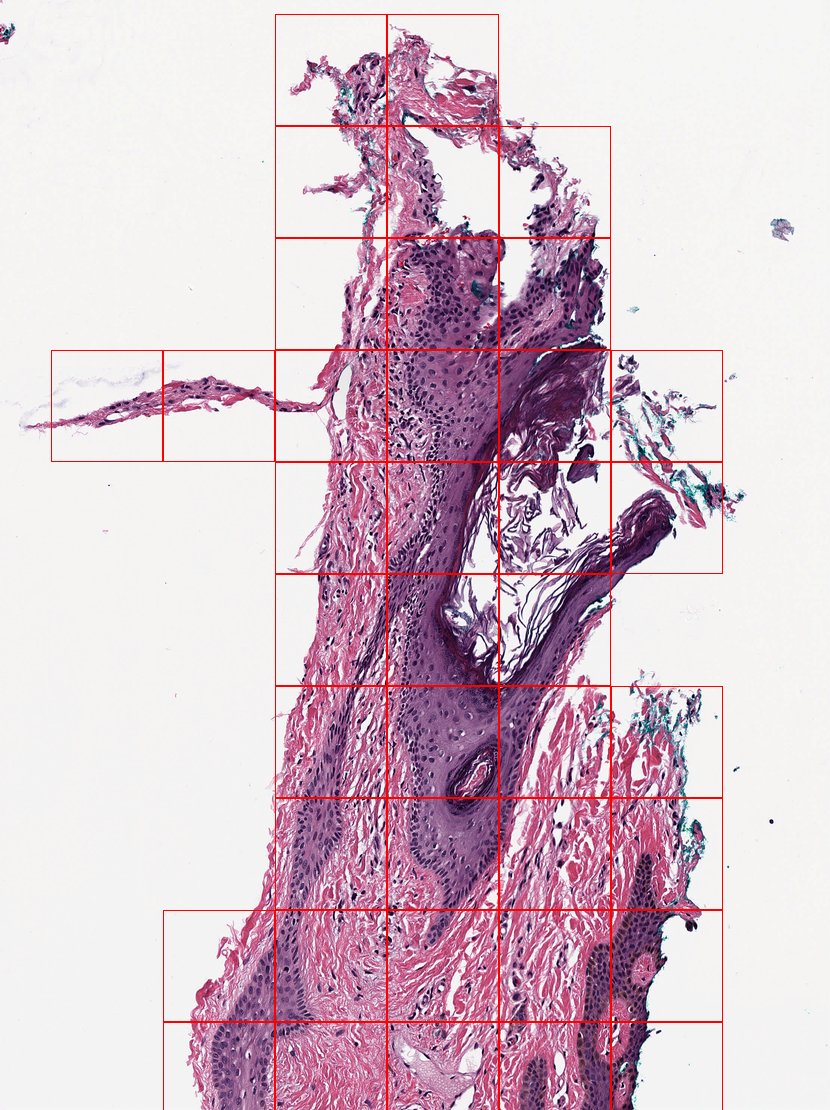


 ../../DigiPath_MLTK_data/module_test/JP2K-33003-1.tfrecords 
 ../../DigiPath_MLTK_data/Aperio/../../DigiPath_MLTK_data/Aperio/JP2K-33003-1.svs
(843, 960)


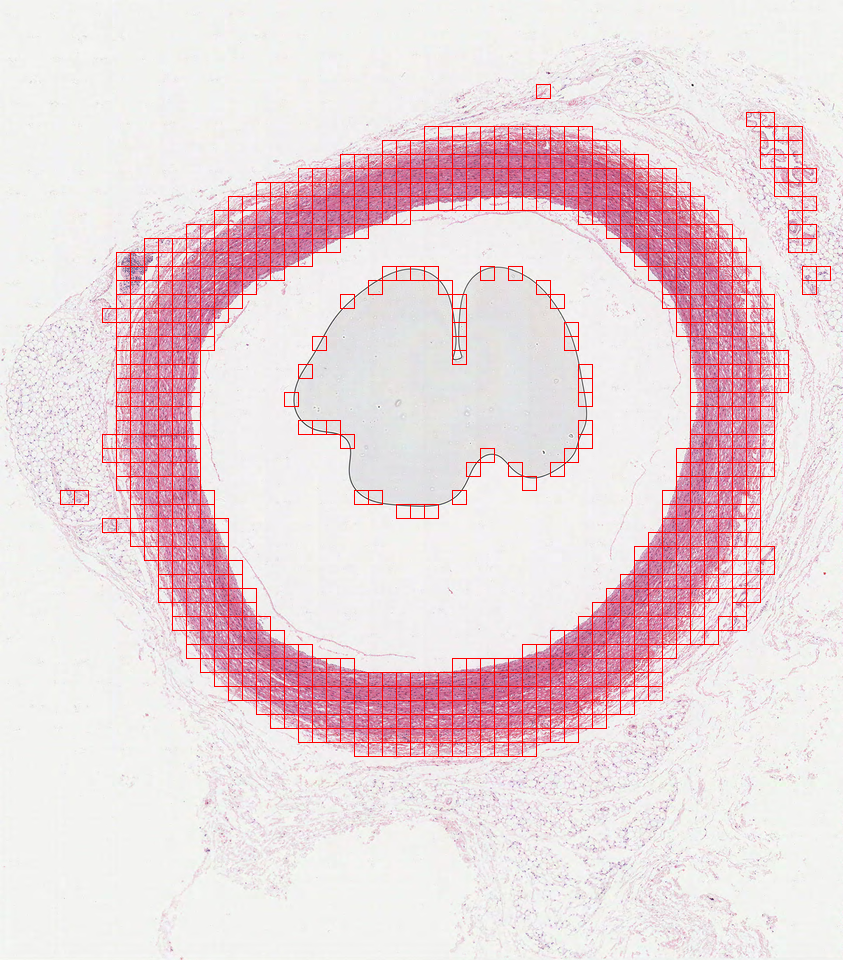


 ../../DigiPath_MLTK_data/module_test/CMU-1-JP2K-33005.tfrecords 
 ../../DigiPath_MLTK_data/Aperio/../../DigiPath_MLTK_data/Aperio/CMU-1-JP2K-33005.svs
(1027, 734)


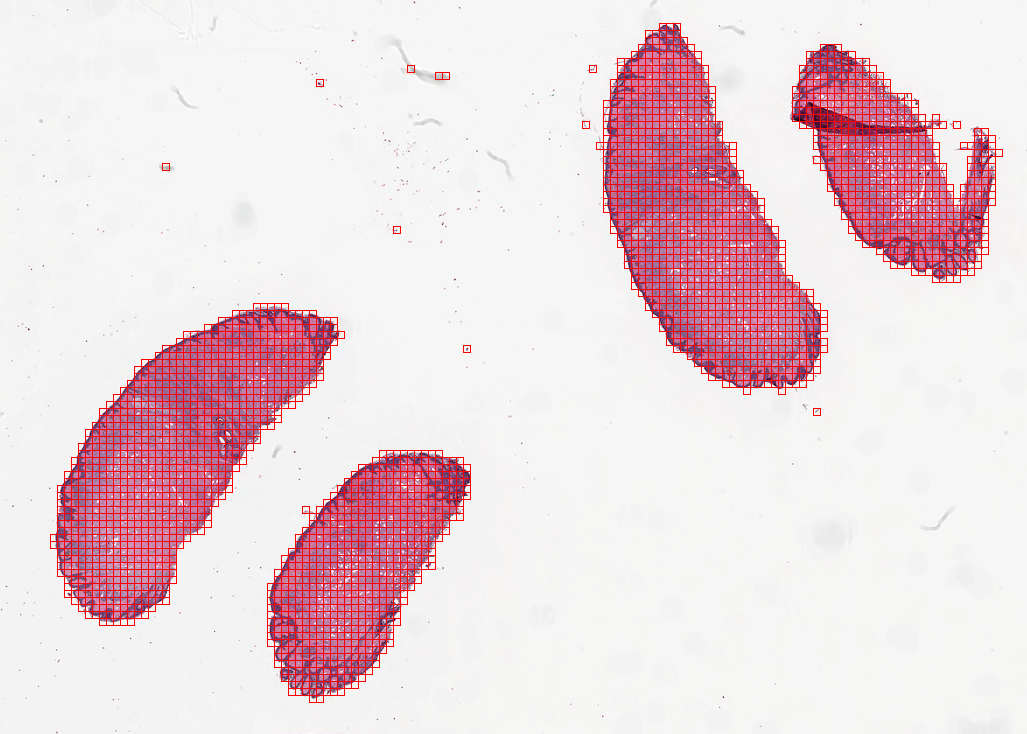


 ../../DigiPath_MLTK_data/module_test/CMU-1.tfrecords 
 ../../DigiPath_MLTK_data/Aperio/../../DigiPath_MLTK_data/Aperio/CMU-1.svs
(1028, 735)


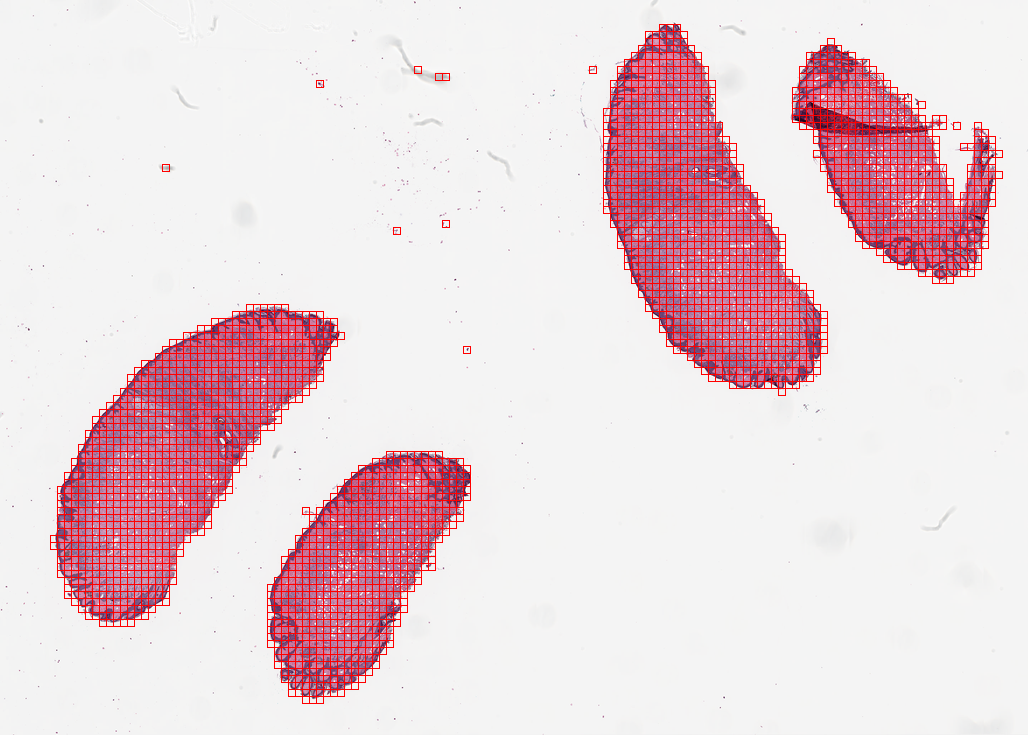


 ../../DigiPath_MLTK_data/module_test/CMU-3.tfrecords 
 ../../DigiPath_MLTK_data/Aperio/../../DigiPath_MLTK_data/Aperio/CMU-3.svs
(709, 487)


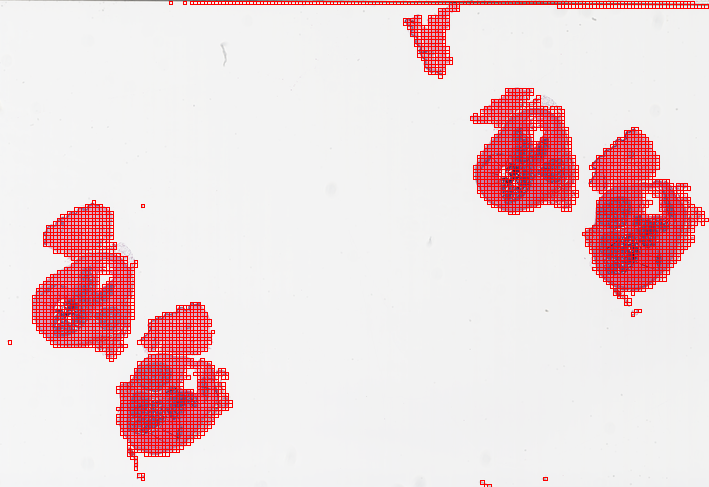


 ../../DigiPath_MLTK_data/module_test/JP2K-33003-2.tfrecords 
 ../../DigiPath_MLTK_data/Aperio/../../DigiPath_MLTK_data/Aperio/JP2K-33003-2.svs
(707, 1020)


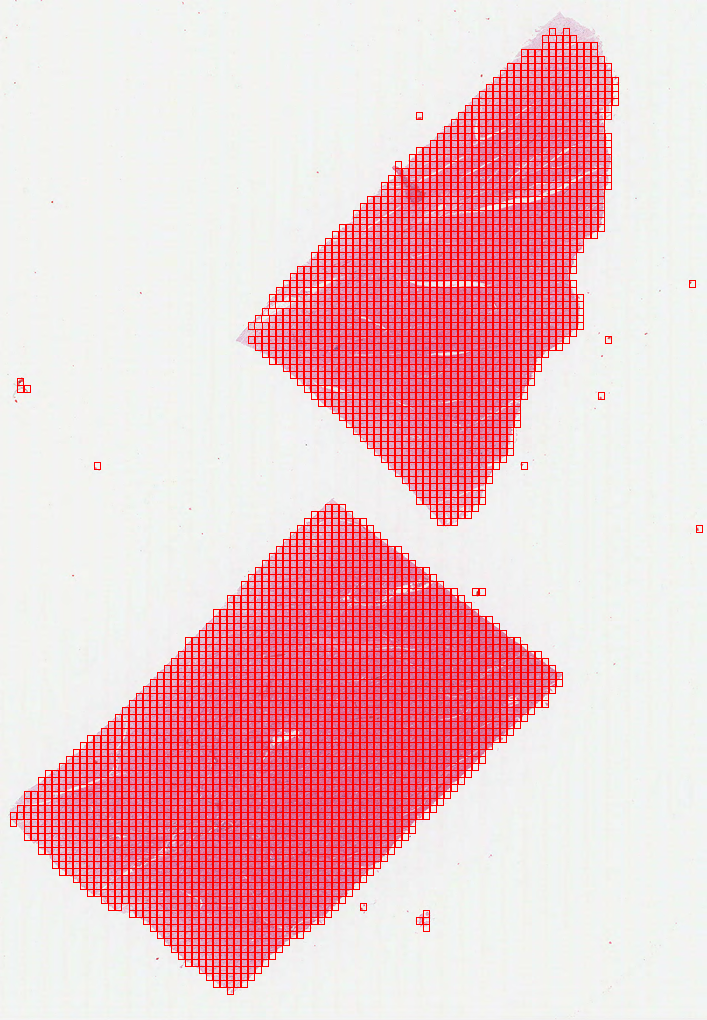


 ../../DigiPath_MLTK_data/module_test/CMU-2.tfrecords 
 ../../DigiPath_MLTK_data/Aperio/../../DigiPath_MLTK_data/Aperio/CMU-2.svs
(475, 185)


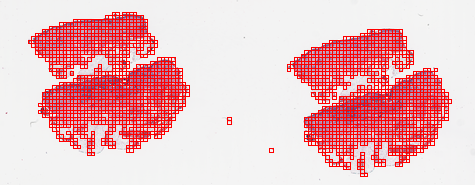

In [8]:
for k in range(len(imf_tfr_list)):
    tfrecord_filename = imf_tfr_list[k][1]
    svs_file_name = imf_tfr_list[k][0]
    print('\n', tfrecord_filename, '\n', svs_file_name)
    wsi_filename = svs_file_name

    o_thum = get_tfrecord_marked_thumbnail(tfrecord_filename, wsi_filename, border_color='red')
    print(o_thum.size)
    display(o_thum)

In [ ]:
tfrecord_filename = '../../DigiPath_MLTK_data/module_test/CMU-1-Small-Region.tfrecords'

wsi_filename = '../../DigiPath_MLTK_data/Aperio/CMU-1-Small-Region.svs'
# size of thumbnail relative to wsi
thumb_scale = 1/8
# larger alpha is darker mask
alpha = 0.05

o_thum = get_tfrecord_marked_thumbnail(tfrecord_filename, wsi_filename, thumb_scale, border_color='red')
print(o_thum.size)
display(o_thum)

In [ ]:
# oo_thum = get_tfrecord_masked_thumbnail(tfrecord_filename, wsi_filename, thumb_scale=1, alpha=0.05)
# print(oo_thum.size)
# display(oo_thum)